## NON-SYNTHETIC DATA

Non-synthetic approach to the analysis.
No imputation of data and all rows with missing data were dropped and columns with missing data and unusefull data.

1. Agasi Herbert
2. Kiberu Davis
3. Kakembo Fredrick



# Loading the neccessary modules

In [1]:
from pycaret.classification import *
from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from pandas_profiling import ProfileReport
import pandas as pd
import missingno as msno
from featurewiz import featurewiz
import matplotlib.pyplot as plt
import mlflow
mlflow.set_tracking_uri('http://137.63.194.17:30009')

%matplotlib inline
#plt.rcParams['font.family'] = 'DejaVu Sans'  ## plot font

/home/kiberu/anaconda3/envs/ML/lib/python3.6/site-packages/pycaret/loggers/mlflow_logger.py:14: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  import mlflow


Imported featurewiz: advanced feature engg and selection library. Version=0.0.42
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


## Loading the data

In [2]:
data = pd.read_csv("20-03-2023_hash_clean.csv")

## Preview of the data

In [3]:
data.head()

Study_ID  status Date_of_entry Date_of_Birth   Age  Religious_affiliation  \
0      5001     5.0    19-03-2019    19-12-2000  18.0                    1.0   
1      5002     5.0    29-05-2019    28-12-1993  25.0                    1.0   
2      5003     5.0    16-05-2019     7/11/1985  33.0                    2.0   
3      5004     5.0    21-03-2019      8/5/1991  27.0                    1.0   
4      5005     5.0      9/4/2019     2/10/1999  19.0                    1.0   

   Education  Marital_status  Tribe_mother  Tribe_father  Smoking_history  \
0        3.0             3.0           4.0           3.0              1.0   
1        4.0             1.0           3.0           3.0              1.0   
2        3.0             1.0           3.0           3.0              1.0   
3        6.0             1.0           3.0           3.0              1.0   
4        3.0             1.0           NaN           3.0              1.0   

   alcohol   bp  stroke  HIV_status  FH_diabetes  FH_pre_eclampsia  \
0      1.0  1.0     1.0         1.0          2.0               1.0   
1      2.0  1.0     1.0         1.0          1.0               1.0   
2      1.0  1.0     1.0         1.0          2.0               1.0   
3      1.0  1.0     1.0         1.0          1.0               1.0   
4      1.0  1.0     1.0         1.0          1.0               1.0   

   FH_hypertension  pregnancy  order_preg  No_preg  abortions_ectopic  Label  \
0              2.0        2.0         NaN      NaN                NaN    NaN   
1              1.0        1.0         2.0      1.0                0.0    0.0   
2              2.0        1.0         9.0      8.0                0.0    0.0   
3              2.0        1.0         2.0      1.0                0.0    0.0   
4              1.0        1.0         2.0      0.0                1.0    1.0   

   weight_less  weight_more_than  d_hyp  Months  preg_duration  condom  \
0          NaN               NaN    NaN     NaN            1.0     1.0   
1          1.0               1.0    1.0    77.0            NaN     1.0   
2          1.0               2.0    1.0    30.0            NaN     1.0   
3          1.0               2.0    1.0    70.0            NaN     1.0   
4          1.0               1.0    1.0    11.0            NaN     1.0   

   partner  H_infertility  Gestational_age  
0      3.0            1.0             28.0  
1      2.0            1.0             26.0  
2      2.0            1.0             26.0  
3      2.0            1.0              NaN  
4      1.0            1.0             38.0

## Dimensions of the data

In [4]:
data.shape

(1006, 32)

## Missing data

Using the the msno libraary we can get a graphical interpretation of the the missing data.

In [5]:
msno.matrix(data)

<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [6]:
data.isna().sum()

Study_ID                   0
status                     1
Date_of_entry              1
Date_of_Birth              1
Age                        1
Religious_affiliation      2
Education                  2
Marital_status             1
Tribe_mother              22
Tribe_father               3
Smoking_history            1
alcohol                    1
bp                         1
stroke                     1
HIV_status                 1
FH_diabetes                1
FH_pre_eclampsia           2
FH_hypertension            1
pregnancy                  1
order_preg               359
No_preg                  359
abortions_ectopic        359
Label                    359
weight_less              360
weight_more_than         362
d_hyp                    363
Months                   404
preg_duration            646
condom                    29
partner                   21
H_infertility             17
Gestational_age           99
dtype: int64

## Deriving the label

- Changing all values greater than 0 to 1.
- This is to get ensure the label is binary.

In [7]:
mapv ={
            0.0 : 0,
            1.0 : 1,
            2.0 : 1,
            3.0 : 1,
            4.0 : 1,
            5.0 : 1,
            6.0 : 1
            }
data["abortions_ectopic"].replace(mapv,inplace=True)

## Filling the missing abortions_ecotpic with 9090 remove na

In [8]:
data["abortions_ectopic"].fillna(9090,inplace=True)
data = data[data["abortions_ectopic"]!=9090]

### Finding the numbers within the data.

In [9]:
print(data.shape)
data.isna().sum()

(647, 32)


Study_ID                   0
status                     0
Date_of_entry              0
Date_of_Birth              0
Age                        0
Religious_affiliation      0
Education                  1
Marital_status             0
Tribe_mother               8
Tribe_father               1
Smoking_history            0
alcohol                    0
bp                         0
stroke                     0
HIV_status                 0
FH_diabetes                0
FH_pre_eclampsia           1
FH_hypertension            0
pregnancy                  0
order_preg                 0
No_preg                    0
abortions_ectopic          0
Label                      0
weight_less                1
weight_more_than           3
d_hyp                      4
Months                    46
preg_duration            643
condom                    28
partner                   14
H_infertility              7
Gestational_age           65
dtype: int64

## Dropping the columns and rows.

In [10]:
#Dropping by column
mod_data1 = data.dropna(axis=1,thresh=350)
print(mod_data1.shape)

(647, 31)


In [11]:
#Dropping by row
mod_data1 = mod_data1.dropna()
print(mod_data1.shape)

(503, 31)


## Graphical representation of the data

<AxesSubplot:>

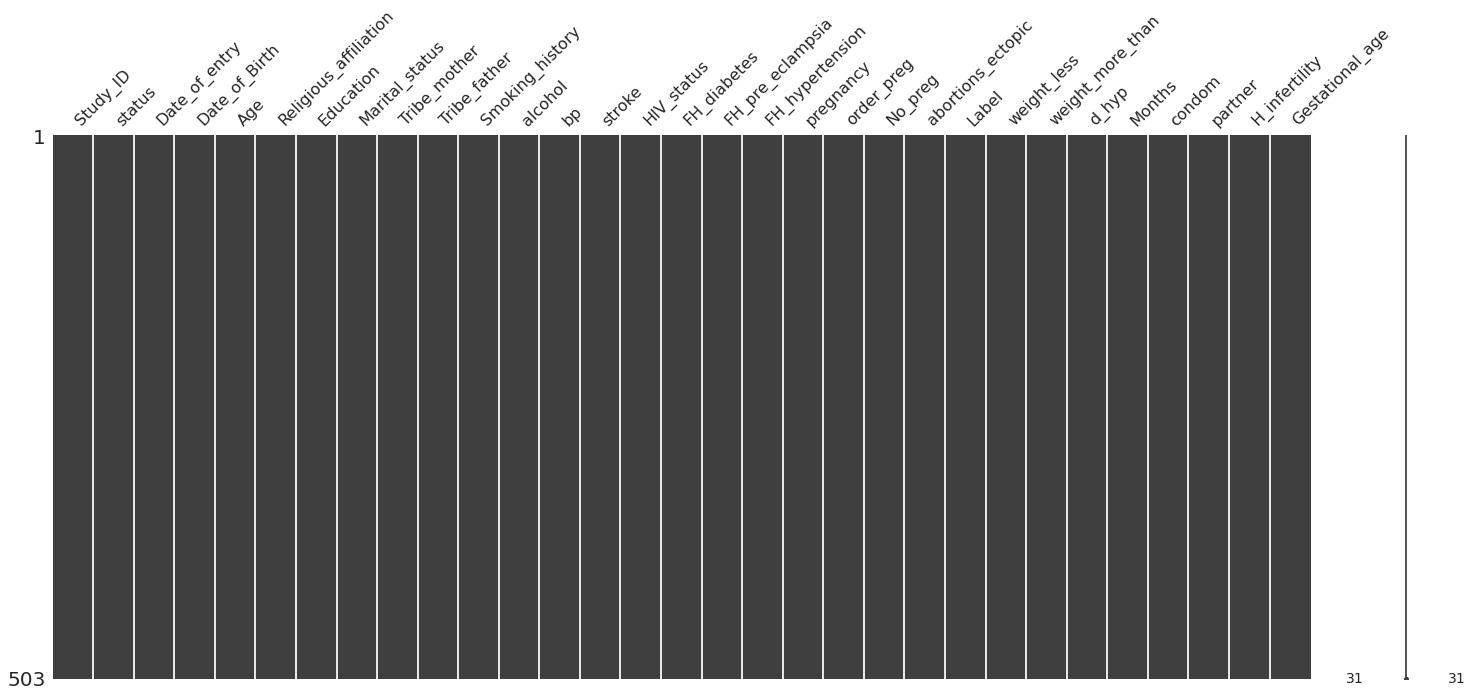

In [12]:
msno.matrix(mod_data1)

## Comparing the missing columns

In [13]:
# Assuming df1 and df2 are the two dataframes
common_columns = set(data.columns).intersection(set(mod_data1.columns))
non_common_columns = set(data.columns) - common_columns

print("Common columns in df1:", common_columns)
non_common_columns = set(data.columns) - common_columns
print("Non-common columns in df2:", non_common_columns)

print("The number of columns dopped: {}".format(len(non_common_columns)))
print("The number of rows dopped: {}".format(data.shape[0]-mod_data1.shape[0]))

Common columns in df1: {'condom', 'Gestational_age', 'FH_hypertension', 'Label', 'alcohol', 'd_hyp', 'Marital_status', 'weight_less', 'Date_of_entry', 'Months', 'pregnancy', 'Age', 'FH_diabetes', 'No_preg', 'stroke', 'Smoking_history', 'Date_of_Birth', 'Tribe_father', 'Study_ID', 'status', 'weight_more_than', 'Tribe_mother', 'HIV_status', 'FH_pre_eclampsia', 'partner', 'order_preg', 'Religious_affiliation', 'bp', 'Education', 'abortions_ectopic', 'H_infertility'}
Non-common columns in df2: {'preg_duration'}
The number of columns dopped: 1
The number of rows dopped: 144




## Pandas Profiling Report

In [14]:
PReport = ProfileReport(mod_data1)
PReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Preview of the modified data

In [15]:
mod_data1.head()

Study_ID  status Date_of_entry Date_of_Birth   Age  Religious_affiliation  \
1      5002     5.0    29-05-2019    28-12-1993  25.0                    1.0   
2      5003     5.0    16-05-2019     7/11/1985  33.0                    2.0   
5      5006     5.0    28-03-2019    15-02-1991  28.0                    2.0   
6      5007     5.0    27-03-2019    17-04-1994  24.0                    1.0   
9      5010     5.0      3/4/2019      4/6/1997  22.0                    1.0   

   Education  Marital_status  Tribe_mother  Tribe_father  Smoking_history  \
1        4.0             1.0           3.0           3.0              1.0   
2        3.0             1.0           3.0           3.0              1.0   
5        6.0             1.0           2.0           2.0              1.0   
6        6.0             1.0           2.0           3.0              1.0   
9        3.0             1.0           3.0           3.0              1.0   

   alcohol   bp  stroke  HIV_status  FH_diabetes  FH_pre_eclampsia  \
1      2.0  1.0     1.0         1.0          1.0               1.0   
2      1.0  1.0     1.0         1.0          2.0               1.0   
5      1.0  1.0     1.0         1.0          1.0               1.0   
6      1.0  1.0     1.0         1.0          1.0               1.0   
9      1.0  1.0     1.0         2.0          1.0               1.0   

   FH_hypertension  pregnancy  order_preg  No_preg  abortions_ectopic  Label  \
1              1.0        1.0         2.0      1.0                0.0    0.0   
2              2.0        1.0         9.0      8.0                0.0    0.0   
5              1.0        1.0         4.0      2.0                1.0    1.0   
6              1.0        1.0         2.0      1.0                0.0    0.0   
9              1.0        1.0         2.0      1.0                0.0    0.0   

   weight_less  weight_more_than  d_hyp  Months  condom  partner  \
1          1.0               1.0    1.0    77.0     1.0      2.0   
2          1.0               2.0    1.0    30.0     1.0      2.0   
5          1.0               1.0    1.0    84.0     1.0      1.0   
6          1.0               2.0    1.0    35.0     1.0      1.0   
9          1.0               1.0    1.0    46.0     1.0      2.0   

   H_infertility  Gestational_age  
1            1.0             26.0  
2            1.0             26.0  
5            1.0             26.0  
6            1.0             19.0  
9            1.0             12.0

## Determining the number of individuals per class

In [16]:
mod_data1["abortions_ectopic"].value_counts()

0.0    333
1.0    170
Name: abortions_ectopic, dtype: int64

Text(0, 0.5, 'Number of individuals')

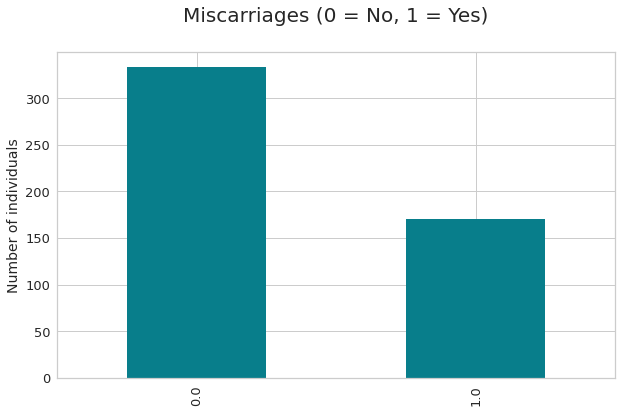

In [48]:
ax = mod_data1["abortions_ectopic"].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Miscarriages (0 = No, 1 = Yes)', size=20, pad=30)
# Modify y-axis tick labels
ax.set_yticklabels([int(label) if label.is_integer() else label for label in ax.get_yticks()])
ax.set_ylabel('Number of individuals', fontsize=14)

## Dropping columns that aren't neccessary for the model.
- Study_ID
- Date of Entry
- Pregnacy
- Smoking_history
- Label


# Base Experiment


In [18]:
mod_data1.drop(columns=["Study_ID","Date_of_entry","Label","Date_of_Birth","pregnancy","Smoking_history", "status"],inplace=True)

In [19]:
mod_data1.shape

(503, 24)

In [20]:
#s = setup(mod_data1,target="abortions_ectopic",log_experiment = True, experiment_name = 'Non_synthetic_basemodel',fold=30, fix_imbalance=False, silent=True, session_id=1)
s = setup(mod_data1,target="abortions_ectopic",fold=30, fix_imbalance=False, session_id=1, silent=True)

In [21]:
best = compare_models()

## List of possible curves with pycaret

- ‘auc’ - Area Under the Curve
- ‘threshold’ - Discrimination Threshold
- ‘pr’ - Precision-Recall Curve
- ‘confusion_matrix’ - Confusion Matrix
- ‘error’ - Class Prediction Error
- ‘class_report’ - Classification Report
- ‘boundary’ - Decision Boundary
- ‘rfe’ - Recursive Feature Selection
- ‘learning’ - Learning Curve
- ‘manifold’ - Manifold Learning
- ‘calibration’ - Calibration Curve
- ‘vc’ - Validation Curve
- ‘dimension’ - Dimension Learning
- ‘feature’ - Feature Importance
- ‘feature_all’ - Feature Importance
- ‘parameter’ - Model Hyperparameter
- ‘lift’ - Lift Curve
- ‘gain’ - Gain Chart
- ‘tree’ - Decision Tree
- ‘ks’ - KS Statistic Plot

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


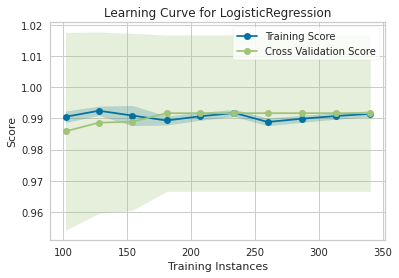

In [22]:
# check the residuals of trained model

plot_model(best, plot ="learning")

## Looking at the feature importance

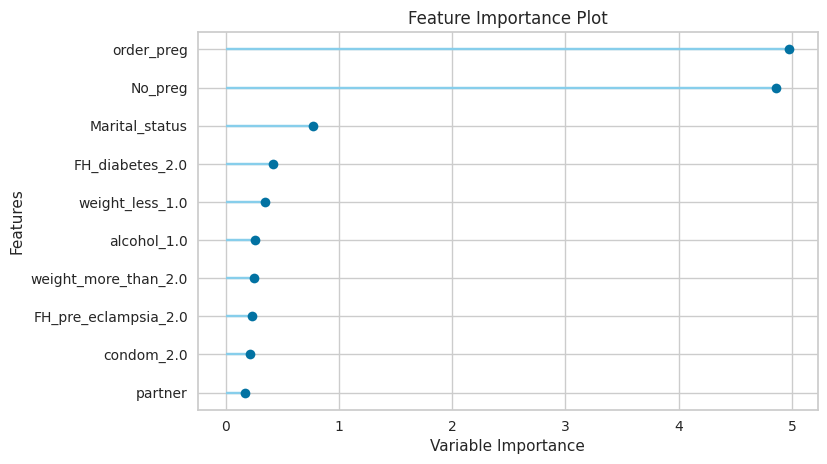

In [23]:
# check feature importance
plot_model(best, plot = 'feature')

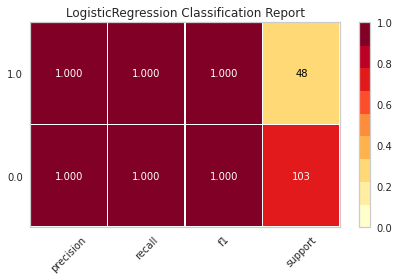

In [24]:
# check feature importance
plot_model(best, plot = 'class_report')

# Modifications to the model


# Feature Selection with featurewiz
1. Automatically pre-process data.
2. Perform feature engineering automatically.
3. Perform feature reduction automatically
4. Explain SULOV method graphically
5. Build a fast XGBoost or LightGBM model



### Parameter explanation

1.   **corr_limit:**
The default is 0.7 which means variables less than -0.7 and greater than 0.7 in pearson's correlation will be candidates for removal.

2.   **feature_engg:**
You can let featurewiz select its best encoders for your data set by setting this flag for adding feature engineering. There are three choices. You can choose one, two or all three (interactions,groupby,target and default).

3. **verbose**
*  limited output. Great for running this silently and getting fast results.
*  more verbiage. Great for knowing how results were and making changes to flags in input.
*  SULOV charts and output. Great for finding out what happens under the hood for SULOV method.








Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (503, 24)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    23 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No GPU active on this device
    Running XGBoost using CPU parameters
Removing 0 columns from further processing since ID or low information variables
    columns removed: []
    After removing redundant variables from further processing, features left = 23
#### Single_Label Binary_Classification Feature Selection Started ####
Searching for highly correlated variables from 23 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Variables (takes time...)

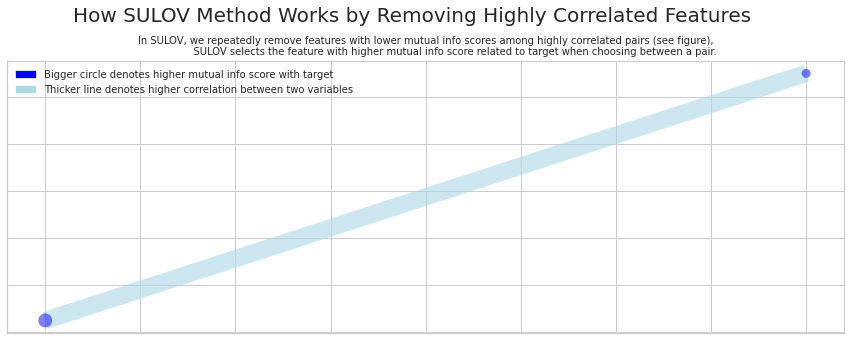

    Adding 0 categorical variables to reduced numeric variables  of 22
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 22 
    Finding Important Features using Boosted Trees algorithm...
        using 22 variables...
        using 18 variables...
        using 14 variables...
        using 10 variables...
        using 6 variables...
        using 2 variables...
Selected 15 important features from your dataset
    Time taken (in seconds) = 1
Returning list of 15 important features and dataframe.


In [25]:
sfeatures = featurewiz(mod_data1,target="abortions_ectopic",corr_limit=0.7,
                                verbose=2)

## Running the model with selected features

In [26]:
sfeatures

(['No_preg',
  'Months',
  'FH_diabetes',
  'Age',
  'partner',
  'FH_hypertension',
  'weight_more_than',
  'alcohol',
  'd_hyp',
  'Education',
  'H_infertility',
  'Tribe_father',
  'Gestational_age',
  'weight_less',
  'condom'],
       No_preg  Months  FH_diabetes   Age  partner  FH_hypertension  \
 1         1.0    77.0          1.0  25.0      2.0              1.0   
 2         8.0    30.0          2.0  33.0      2.0              2.0   
 5         2.0    84.0          1.0  28.0      1.0              1.0   
 6         1.0    35.0          1.0  24.0      1.0              1.0   
 9         1.0    46.0          1.0  22.0      2.0              1.0   
 ...       ...     ...          ...   ...      ...              ...   
 991       3.0    29.0          2.0  28.0      1.0              2.0   
 995       2.0   192.0          1.0  38.0      2.0              2.0   
 998       1.0    72.0          1.0  24.0      1.0              2.0   
 1000      3.0    27.0          1.0  35.0      1.0      

In [27]:
mod_data1.head()

Age  Religious_affiliation  Education  Marital_status  Tribe_mother  \
1  25.0                    1.0        4.0             1.0           3.0   
2  33.0                    2.0        3.0             1.0           3.0   
5  28.0                    2.0        6.0             1.0           2.0   
6  24.0                    1.0        6.0             1.0           2.0   
9  22.0                    1.0        3.0             1.0           3.0   

   Tribe_father  alcohol   bp  stroke  HIV_status  ...  No_preg  \
1           3.0      2.0  1.0     1.0         1.0  ...      1.0   
2           3.0      1.0  1.0     1.0         1.0  ...      8.0   
5           2.0      1.0  1.0     1.0         1.0  ...      2.0   
6           3.0      1.0  1.0     1.0         1.0  ...      1.0   
9           3.0      1.0  1.0     1.0         2.0  ...      1.0   

   abortions_ectopic  weight_less  weight_more_than  d_hyp  Months  condom  \
1                0.0          1.0               1.0    1.0    77.0     1.0   
2                0.0          1.0               2.0    1.0    30.0     1.0   
5                1.0          1.0               1.0    1.0    84.0     1.0   
6                0.0          1.0               2.0    1.0    35.0     1.0   
9                0.0          1.0               1.0    1.0    46.0     1.0   

   partner  H_infertility  Gestational_age  
1      2.0            1.0             26.0  
2      2.0            1.0             26.0  
5      1.0            1.0             26.0  
6      1.0            1.0             19.0  
9      2.0            1.0             12.0  

[5 rows x 24 columns]

## model with fixed imbalance (SMOTE)

In [28]:
#mldf = mod_data1.loc[:,['Months','No_preg','Gestational_age','Education','Tribe_mother','FH_diabetes','condom','d_hyp',"abortions_ectopic"]]
mldf = mod_data1.loc[:,['No_preg',
  'Months',
  'FH_diabetes',
  'Age',
  'partner',
  'FH_hypertension',
  'weight_more_than',
  'alcohol',
  'd_hyp',
  'Education',
  'H_infertility',
  'Tribe_father',
  'Gestational_age',
  'weight_less',
  'condom', 'abortions_ectopic']]

In [29]:
#s = setup(mldf,target="abortions_ectopic",feature_selection = True, n_features_to_select=20,log_experiment = True, experiment_name = 'Non_synthetic_third')
fwiz_exp = setup(mldf, # dataframe
                 target="abortions_ectopic", # target variable
                 train_size=0.7, # train_text_split ratio
                 outliers_threshold=0.05, #The percentage of outliers to be removed from the dataset.
                 fix_imbalance=True, #SMOTE (Synthetic Minority Over-sampling Technique) is applied by default to create synthetic datapoints for minority class.
                 data_split_shuffle=True, # shuffling of rows during train_test_split.
                 data_split_stratify=True, #Controls stratification during  train_test_split hence will stratify by target column
                 fold_strategy="kfold", #Choice of cross validation strategy.
                 fold=30, # Number of folds to be used in cross validation.
                 fold_shuffle=True, silent=True, # Controls the shuffle parameter of CV.
                 #log_experiment=True, # Logs the experiment
                 #experiment_name="Non_synth_ectopic_fwiz",
                session_id=1)

In [30]:
compare_models()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

After feature selection the accuracy and mcc scores drop.

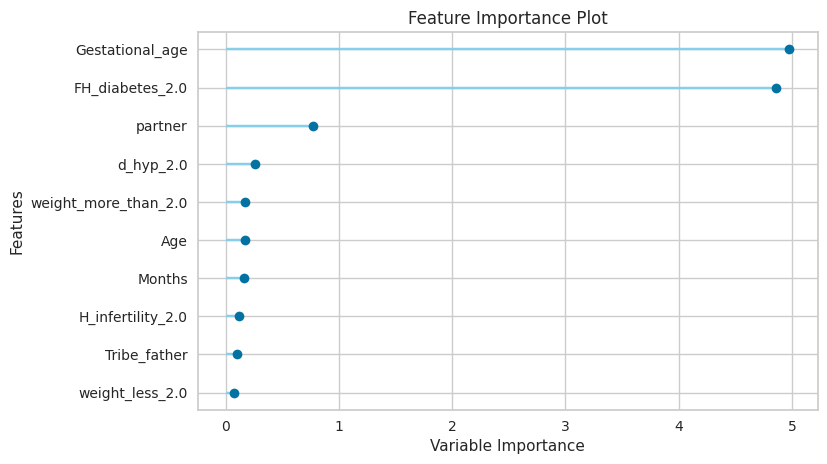

In [31]:
# check feature importance
plot_model(best, plot = 'feature')

## Model without fixing imbalance

In [32]:
#s = setup(mldf,target="abortions_ectopic",feature_selection = True, n_features_to_select=20,log_experiment = True, experiment_name = 'Non_synthetic_third')
fwiz_exp = setup(mldf, # dataframe
                 target="abortions_ectopic", # target variable
                 train_size=0.7, # train_text_split ratio
                 outliers_threshold=0.05, #The percentage of outliers to be removed from the dataset.
                 fix_imbalance=False, #SMOTE (Synthetic Minority Over-sampling Technique) is applied by default to create synthetic datapoints for minority class.
                 data_split_shuffle=True, # shuffling of rows during train_test_split.
                 data_split_stratify=True, #Controls stratification during  train_test_split hence will stratify by target column
                 fold_strategy="kfold", #Choice of cross validation strategy.
                 fold=30, # Number of folds to be used in cross validation.
                 fold_shuffle=True, # Controls the shuffle parameter of CV.
                 #log_experiment=True, # Logs the experiment
                 #experiment_name="Non_synth_ectopic_fwiz",
                 session_id=1, silent=True)

In [33]:
compare_models()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

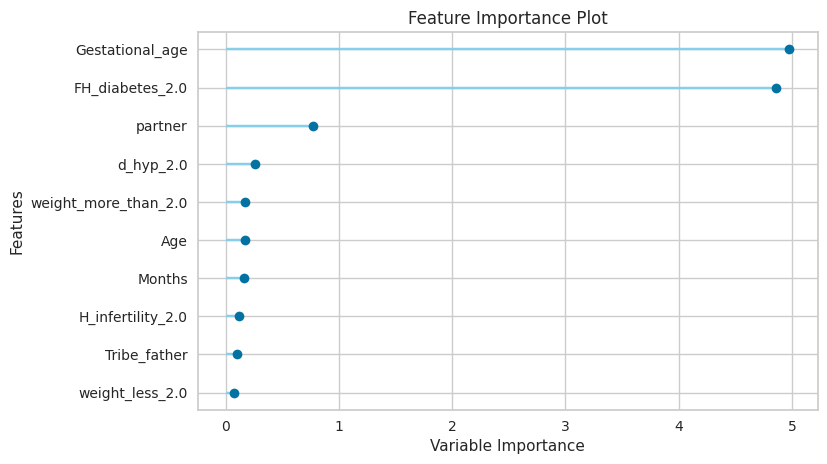

In [34]:
# check feature importance
plot_model(best, plot = 'feature')

## Next steps

 >1. Increase iterations <br>
 >2.Track experiments, install MLflow locally <br>
 >3. Track featurewiz variables <br>
 >4. Compare models <br>
 >5. Fix imbalance, see how it compares with imbalanced data <br>
 >6. Run in a loop, could improve MCC

## BALANCED DATA

In [35]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids

In [36]:
# Separate the features (X) and target variable (y)
X = mod_data1.drop('abortions_ectopic', axis=1)  
y = mod_data1['abortions_ectopic']

# Instantiate the ClusterCentroids object
undersampler = ClusterCentroids()

# Apply ClusterCentroids to downsample the majority class
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [37]:
## unbalanced data
mod_data1.abortions_ectopic.value_counts()

0.0    333
1.0    170
Name: abortions_ectopic, dtype: int64

In [38]:
X_resampled['abortions_ectopic'] = y_resampled

In [39]:
## balanced data
X_resampled.abortions_ectopic.value_counts()

1.0    170
0.0    170
Name: abortions_ectopic, dtype: int64

Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (340, 24)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    23 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No GPU active on this device
    Running XGBoost using CPU parameters
Removing 0 columns from further processing since ID or low information variables
    columns removed: []
    After removing redundant variables from further processing, features left = 23
#### Single_Label Binary_Classification Feature Selection Started ####
Searching for highly correlated variables from 23 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Variables (takes time...)

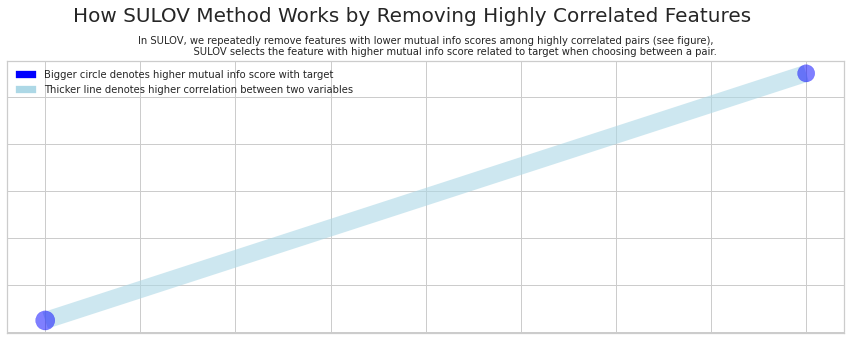

    Adding 0 categorical variables to reduced numeric variables  of 22
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 22 
    Finding Important Features using Boosted Trees algorithm...
        using 22 variables...
        using 18 variables...
        using 14 variables...
        using 10 variables...
        using 6 variables...
        using 2 variables...
Selected 16 important features from your dataset
    Time taken (in seconds) = 1
Returning list of 16 important features and dataframe.


In [40]:
s2features = featurewiz(X_resampled,target="abortions_ectopic",corr_limit=0.7,
                                verbose=2)

In [41]:
s2features

(['FH_diabetes',
  'condom',
  'No_preg',
  'Religious_affiliation',
  'alcohol',
  'HIV_status',
  'partner',
  'weight_more_than',
  'Months',
  'Age',
  'FH_hypertension',
  'Tribe_mother',
  'weight_less',
  'd_hyp',
  'Gestational_age',
  'H_infertility'],
      FH_diabetes  condom   No_preg  Religious_affiliation  alcohol  \
 0       1.333333     1.0  1.666667               1.333333      1.0   
 1       1.000000     2.0  3.000000               1.000000      1.0   
 2       2.000000     1.0  1.000000               1.000000      1.0   
 3       1.000000     1.0  2.000000               1.000000      1.0   
 4       1.000000     1.2  1.800000               1.400000      1.0   
 ..           ...     ...       ...                    ...      ...   
 335     1.000000     1.0  0.000000               1.000000      1.0   
 336     2.000000     2.0  3.000000               2.000000      1.0   
 337     1.000000     1.0  2.000000               1.000000      1.0   
 338     1.000000     2.0  1

In [42]:
mldf2 = X_resampled.loc[:,['FH_pre_eclampsia',
  'd_hyp',
  'FH_diabetes',
  'Religious_affiliation',
  'alcohol',
  'No_preg',
  'condom',
  'Marital_status',
  'weight_less',
  'HIV_status',
  'partner',
  'weight_more_than',
  'FH_hypertension',
  'Tribe_mother',
  'Months',
  'H_infertility',
  'Gestational_age', 'abortions_ectopic']]

In [43]:
s = setup(mldf2, # dataframe
                 target="abortions_ectopic", # target variable
                 train_size=0.7, # train_text_split ratio
                 outliers_threshold=0.05, #The percentage of outliers to be removed from the dataset.
                 fix_imbalance=False, 
                 data_split_shuffle=True, # shuffling of rows during train_test_split.
                 data_split_stratify=True, #Controls stratification during  train_test_split hence will stratify by target column
                 fold_strategy="kfold", #Choice of cross validation strategy.
                 fold=30, # Number of folds to be used in cross validation.
                 fold_shuffle=True, # Controls the shuffle parameter of CV.
                 #log_experiment=True, # Logs the experiment
                 #experiment_name="Non_synth_balanced_fwiz",
                silent=True)#, session_id=1)

In [44]:
compare_models()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=173)

In [45]:
# check feature importance
plot_model(best, plot = 'feature')

Text(0, 0.5, 'Number of individuals')

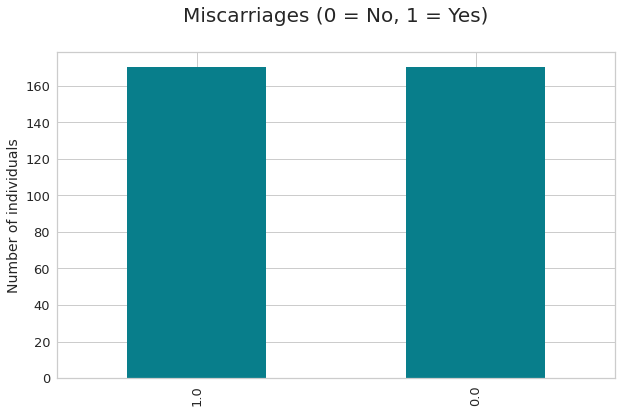

In [49]:
ax = mldf2["abortions_ectopic"].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Miscarriages (0 = No, 1 = Yes)', size=20, pad=30)
# Modify y-axis tick labels
ax.set_yticklabels([int(label) if label.is_integer() else label for label in ax.get_yticks()])
ax.set_ylabel('Number of individuals', fontsize=14)